In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [270]:
dataset=pd.read_csv('heartbeat_data.csv')
df=dataset
dataset.head()

,Date,MLII (mV),V5 (mV),Heart Rate (BPM),R-R Interval (ms),"HRV (RMSSD, ms)"
0,2023-01-01,0.017720,-1.956966,77,779.220779,18.329647
1,2023-01-02,0.830243,-0.475035,67,895.522388,69.703772
2,2023-01-03,-0.393338,-0.631267,96,625.000000,31.678362
3,2023-01-04,0.754272,-0.492413,73,821.917808,43.795005
4,2023-01-05,1.339708,-1.427578,63,952.380952,37.724553


In [272]:
df.drop('Date',axis=1).corr()

,MLII (mV),V5 (mV),Heart Rate (BPM),R-R Interval (ms),"HRV (RMSSD, ms)"
MLII (mV),1.000000,0.006311,-0.032866,0.033061,0.004668
V5 (mV),0.006311,1.000000,0.005232,-0.006462,-0.010399
Heart Rate (BPM),-0.032866,0.005232,1.000000,-0.991358,0.002966
R-R Interval (ms),0.033061,-0.006462,-0.991358,1.000000,-0.001026
"HRV (RMSSD, ms)",0.004668,-0.010399,0.002966,-0.001026,1.000000


In [274]:
df.head()

,Date,MLII (mV),V5 (mV),Heart Rate (BPM),R-R Interval (ms),"HRV (RMSSD, ms)"
0,2023-01-01,0.017720,-1.956966,77,779.220779,18.329647
1,2023-01-02,0.830243,-0.475035,67,895.522388,69.703772
2,2023-01-03,-0.393338,-0.631267,96,625.000000,31.678362
3,2023-01-04,0.754272,-0.492413,73,821.917808,43.795005
4,2023-01-05,1.339708,-1.427578,63,952.380952,37.724553


In [276]:
#deviding independent and dependent features
df.drop(['HRV (RMSSD, ms)','Date'],axis=1,inplace=True)
X=df.drop('Heart Rate (BPM)',axis=1)
X

,MLII (mV),V5 (mV),R-R Interval (ms)
0,0.017720,-1.956966,779.220779
1,0.830243,-0.475035,895.522388
2,-0.393338,-0.631267,625.000000
3,0.754272,-0.492413,821.917808
4,1.339708,-1.427578,952.380952
...,...,...,...
726,-2.126399,-0.835561,689.655172
727,-1.979595,2.119204,714.285714
728,-1.755734,1.128180,625.000000
729,-0.470644,0.957163,769.230769


In [278]:
y=df['Heart Rate (BPM)']
y

0      77
1      67
2      96
3      73
4      63
       ..
726    87
727    84
728    96
729    78
730    64
Name: Heart Rate (BPM), Length: 731, dtype: int64

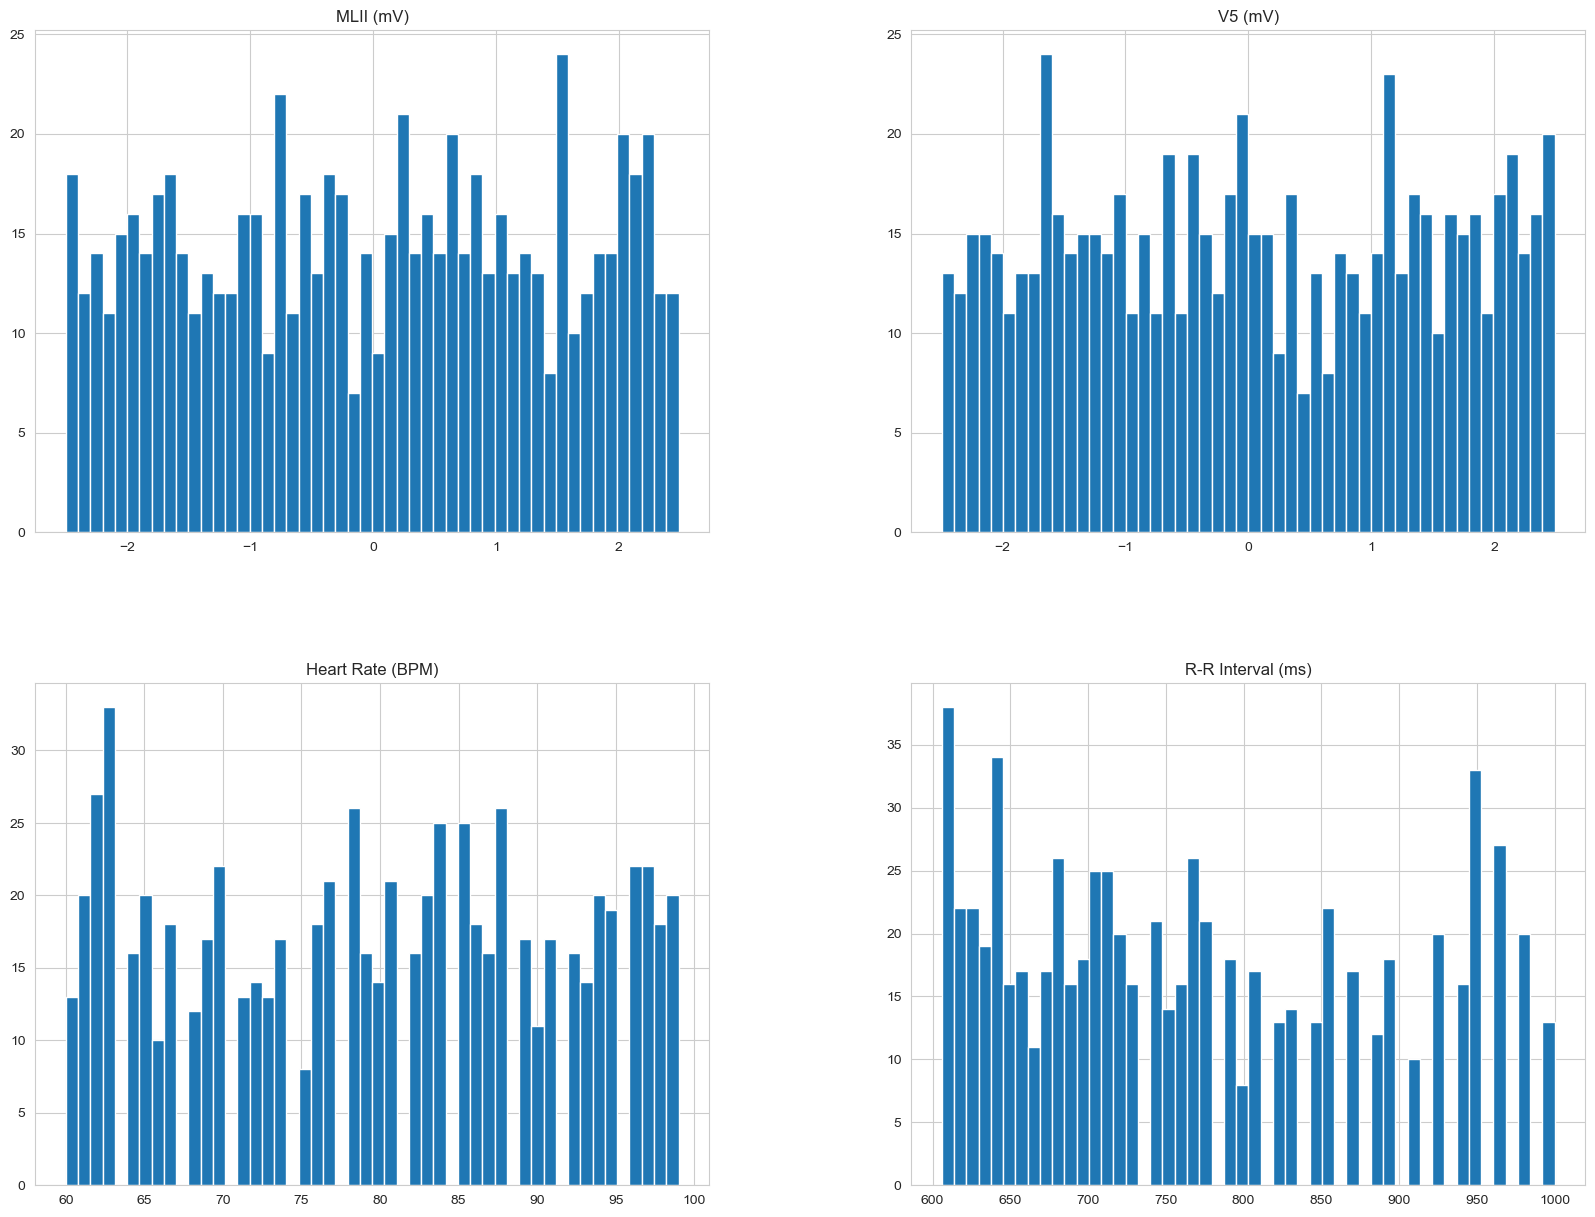

In [280]:

sns.set_style("whitegrid")
df.hist(bins=50,figsize=(20,15))
plt.show()

In [281]:
#correlation 
df.corr()

,MLII (mV),V5 (mV),Heart Rate (BPM),R-R Interval (ms)
MLII (mV),1.000000,0.006311,-0.032866,0.033061
V5 (mV),0.006311,1.000000,0.005232,-0.006462
Heart Rate (BPM),-0.032866,0.005232,1.000000,-0.991358
R-R Interval (ms),0.033061,-0.006462,-0.991358,1.000000


In [283]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

In [284]:
X_train.shape , X_test.shape

((657, 3), (74, 3))

In [285]:
## feature scaling aand standardistation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [286]:
X_train_scaled

array([[ 7.53499962e-01, -1.14041207e-01,  6.43631513e-01],
       [-7.29997057e-01, -5.90529260e-01,  4.47394815e-01],
       [-5.19746969e-01,  1.33233603e+00, -5.36097342e-01],
       ...,
       [ 1.65626456e+00, -1.34419556e+00, -1.10892921e+00],
       [ 1.08428161e+00,  1.40540225e+00, -5.36097342e-01],
       [ 1.49397695e+00, -2.90885625e-01,  8.30534154e-04]])

Text(0.5, 1.0, 'X_train After Scaling')

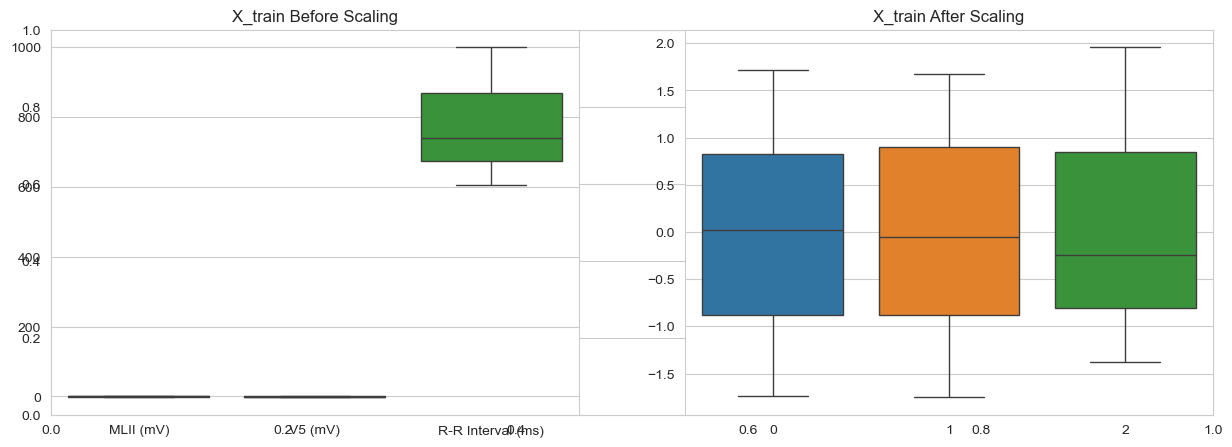

In [287]:
# Box plots to understand effects of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### linear regression model training

In [308]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
# for  training data
y_train_pred=linreg.predict(X_train_scaled)
mae_on_train_data=mean_absolute_error(y_train,y_train_pred)
r2_on_trained_data=r2_score(y_train,y_train_pred)
print("mean absolute error for training data: ",mae_on_train_data)
print("R2_Score for training data: ",r2_on_trained_data)
# for test data
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error for testing data: ",mae)
print("R2 Score for testing data: ",score)

mean absolute error for training data:  1.3673587990810463
R2_Score for training data:  0.9828397879103714
mean absolute error for testing data:  1.3224758882884062
R2 Score for testing data:  0.9820207834430641


AS BOTH TRAINING AND TESTING DATA ARE HAVING SIMILAR R2 AND MAE SCORE SO ITS NOT OVERFITTING

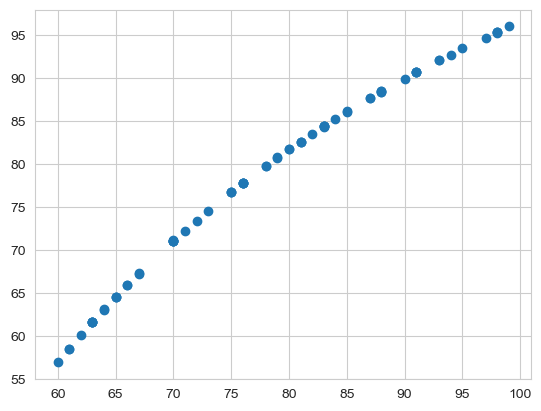

In [313]:
#Also we can check it using y_test and y_pred scatter plot
plt.scatter(y_test,y_pred)
#if the plot follows linear relationship then it is very good model

## Lasso Regression Model

mean absolute error for training data:  1.508639255686196
R2_Score for training data:  0.9756587911812251
mean absolute error for testing data:  1.4408692489736794
R2 Score for testing data:  0.9757467678813061


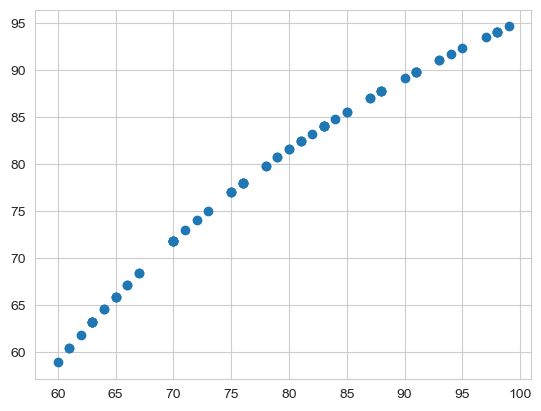

In [320]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
# for  training data
y_train_pred=lasso.predict(X_train_scaled)
mae_on_train_data=mean_absolute_error(y_train,y_train_pred)
r2_on_trained_data=r2_score(y_train,y_train_pred)
print("mean absolute error for training data: ",mae_on_train_data)
print("R2_Score for training data: ",r2_on_trained_data)
# for test data
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error for testing data: ",mae)
print("R2 Score for testing data: ",score)
plt.scatter(y_test,y_pred)

## Ridge Regression Model